## Observations and Insights 

In [331]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudy_complete = pd.merge(mouse_metadata , study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouseStudy_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [332]:
# count the number of rows in combine file
cnt_rows = len(mouseStudy_complete)
pd.DataFrame({"Row Count": [cnt_rows]}) 

,Row Count
0,1893


In [333]:
# Checking the number of mice.
nbr_mices=len(mouseStudy_complete["Mouse ID"].unique())

pd.DataFrame({"Total Number of Mices": [nbr_mices]})

,Total Number of Mices
0,249


In [334]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_MiceID=mouseStudy_complete[mouseStudy_complete.duplicated(["Mouse ID", "Timepoint"])]
print(dupes_MiceID.index)


Int64Index([909, 911, 913, 915, 917], dtype='int64')


In [335]:
# Optional: Get all the data for the duplicate mouse ID. 
dfMouseID =pd.DataFrame(mouseStudy_complete, columns=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)",
                                                                "Timepoint","Tumor Volume (mm3)","Metastatic Sites"])

dupMouseID = dfMouseID[dfMouseID.duplicated(["Mouse ID", "Timepoint"])]   
dupMouseID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [336]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_Mice_df = mouseStudy_complete.drop(dupMouseID.index)
new_Mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [337]:
cnt_newRows = len(new_Mice_df)
pd.DataFrame({"Row Count": [cnt_newRows]}) 

,Row Count
0,1888


In [338]:
# Checking the number of mice in the clean DataFrame.
new_nbr_mices=len(new_Mice_df["Mouse ID"].unique())

pd.DataFrame({"Total Number of Mices": [new_nbr_mices]})

,Total Number of Mices
0,249


## Summary Statistics

In [339]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Sumry_Status_Cnt = new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
Sumry_Status_Mean= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Sumry_Status_Median= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Sumry_Status_Variance= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Sumry_Status_STD= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Sumry_Status_SEM= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble into DataFrame
summary_stat = pd.DataFrame({
                             "Mean": Sumry_Status_Mean,
                             "Median": Sumry_Status_Median,
                             "Variance": Sumry_Status_Variance,
                             "Standard Deviation": Sumry_Status_STD,
                             "SEM": Sumry_Status_SEM
                            
                            })

type_summary = summary_stat[["Mean", 
                             "Median",
                             "Variance",
                             "Standard Deviation",
                             "SEM"]]


# Display results
type_summary.round(3)




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [340]:
Sumry_Status = new_Mice_df.groupby(["Drug Regimen"]).count()
Sumry_Status["Volume"] = new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
Sumry_Status["Mean"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Sumry_Status["Median"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Sumry_Status["Variance"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Sumry_Status["Standard Deviation"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Sumry_Status["SEM"]= new_Mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
Summary_Statistics = Sumry_Status[["Mean","Median","Variance","Standard Deviation","SEM"]].round(2)
Summary_Statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [341]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggSummary =  new_Mice_df.groupby("Drug Regimen", as_index=True).agg(
        Mean = ('Tumor Volume (mm3)',np.mean),
        Median = ('Tumor Volume (mm3)',np.median),
        Variance = ('Tumor Volume (mm3)',np.var),
        StandardDeviation = ('Tumor Volume (mm3)',np.std),
        SEM = ('Tumor Volume (mm3)',st.sem)       
)

aggSummary.rename(columns={"StandardDeviation": "Standard Deviation"}).round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

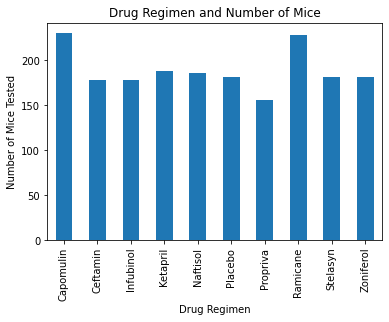

In [389]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Uniq tests 
DrugName= new_Mice_df.groupby(["Drug Regimen"])
MouseCount= DrugName["Mouse ID"].count()

# Create a bar chart 
count_chart = MouseCount.plot(kind='bar')

# Set the xlabel and ylabel 
count_chart.set_title("Drug Regimen and Number of Mice")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")


plt.show()

In [343]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
DrugName= new_Mice_df.groupby(["Drug Regimen"])
MouseCount= DrugName["Mouse ID"].count()
MouseCount

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [ ]:
plt.bar(DrugName, MouseCount, color="r", align="center")
plt.title("Drug Regimen and Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Sex
Female    930
Male      958
Name: Sex, dtype: int64
1888


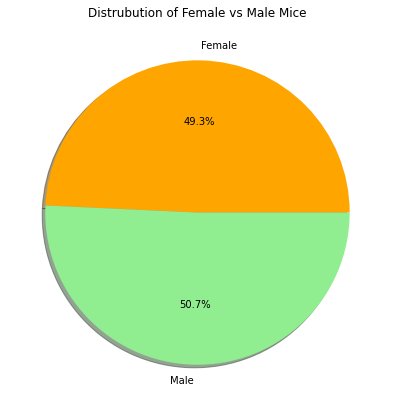

In [404]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df=new_Mice_df.groupby(["Sex"])
sex_cnt = sex_df["Sex"].count()
total = sex_cnt.sum()
print(sex_cnt)
print(total)
count_chart = sex_cnt.plot(kind='pie',
                           title ="Distrubution of Female vs Male Mice",
                           autopct='%1.1f%%',
                           colors =["orange","lightgreen"],
                           figsize=(7,7),
                           label="",
                           shadow=True
                          )

plt.show()

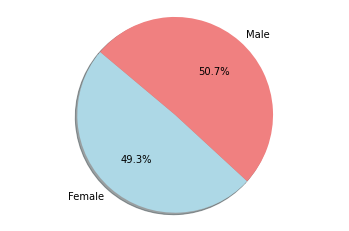

In [401]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= list(sex_cnt.index.values)
colors = ["lightblue", "lightcoral"]
plt.pie(sex_cnt, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
